## 2D Synthetic Data

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import cos, sin, pi

t0 = []
for _ in range(1000):
    t0.append([random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)])
    
t1 = []
for _ in range(1000):
    t1.append([random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)])
    
t0 = np.array(t0)
t1 = np.array(t1)

In [2]:
theta = 45 * pi/180

t0x = cos(theta) * t0[:, 0] - sin(theta) * t0[:, 1]
t0y = sin(theta) * t0[:, 0] + cos(theta) * t0[:, 1]

t1x = cos(theta) * t1[:, 0] - sin(theta) * t1[:, 1]
t1y = sin(theta) * t1[:, 0] + cos(theta) * t1[:, 1]


In [3]:
t1x_ = []
t1y_ = []

t1x__ = []
t1y__ = []

for x, y in zip(t1x, t1y):
    
    if x < 0 or y < 0:
        t1x_.append(x)
        t1y_.append(y)
    else:
        t1x__.append(x)
        t1y__.append(y)        

        
# t1x = np.array(t1x__[:20] + t1x_)
# t1y = np.array(t1y__[:20] + t1y_)

t1x = np.array(t1x_)
t1y = np.array(t1y_)

In [15]:
synth_2d_df = pd.DataFrame({'x1': np.concatenate((t0x , t1x)), 'x2': np.concatenate((t0y, t1y)),\
                            't': np.concatenate((np.zeros(1000), np.ones(752))).astype(int)})
synth_2d_df.to_csv('data/synth_2d_df.csv', index=False)

In [19]:
len(t0y)

1000

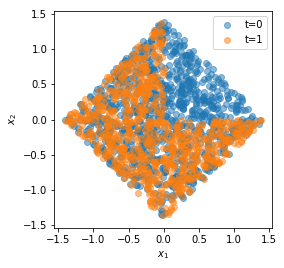

In [18]:
import seaborn as sns
fig, ax = plt.subplots() 

sns.regplot(t0x, t0y, label='t=0', fit_reg=False, scatter_kws={'alpha': 0.5})
sns.regplot(t1x, t1y, label = 't=1', fit_reg=False, scatter_kws={'alpha': 0.5})

# ax.scatter(t0x, t0y, label='t=0')
# ax.scatter(t1x, t1y, label = 't=1')

ax.legend()
ax.set_aspect(aspect='equal')
ax.set_ylabel("$x_2$")
ax.set_xlabel("$x_1$")

ax.grid(False)
plt.show()



In [305]:
ax.get_figure().savefig('scatter.pdf')

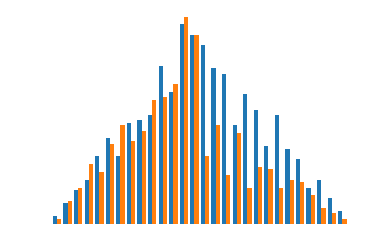

In [276]:
plt.hist([t0x, t1x], bins=np.arange(-1.5, 1.5, 0.1))
plt.axis('off')
plt.savefig('x.pdf')

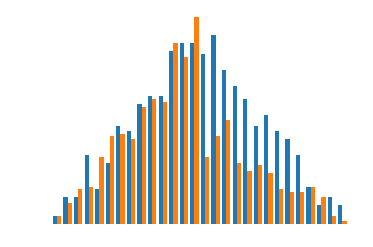

In [277]:
plt.hist([t0y, t1y], bins=np.arange(-1.5, 1.5, 0.1))
plt.axis('off')
plt.savefig('y.pdf')

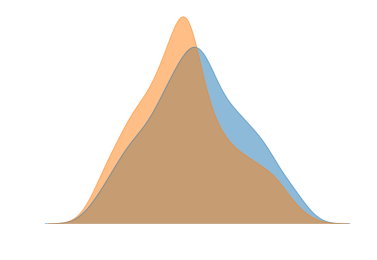

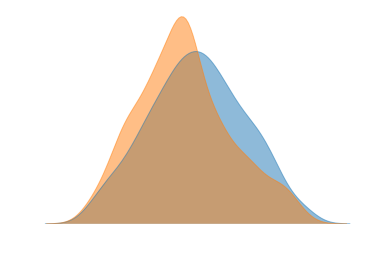

In [309]:
import pandas as pd
dft0 = pd.DataFrame({
    't0x': t0x,
    't0y': t0y,
})
dft1 = pd.DataFrame({
    't1x': t1x,
    't1y': t1y,
})

# dft0['t0x'].plot.kde(legend=False)
# dft1['t1x'].plot.kde(legend=False)
# plt.axis('off')
# plt.show()
# plt.savefig('x.pdf')


import seaborn as sns

sns.distplot(dft0['t0x'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1, 'alpha': 0.5})
sns.distplot(dft1['t1x'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1, 'alpha': 0.5})
plt.axis('off')
plt.savefig('x.pdf')
plt.show()

sns.distplot(dft0['t0y'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1, 'alpha': 0.5})
sns.distplot(dft1['t1y'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1, 'alpha': 0.5})
plt.axis('off')
plt.savefig('y.pdf')

# dft0['t0y'].plot.kde(legend=False, shade=True)
# dft1['t1y'].plot.kde(legend=False, shade=True)
# plt.axis('off')
# plt.savefig('y.pdf')

## 8D Synthetic data

In [170]:
X1 = np.random.uniform
X2 = np.random.binomial
X3 = np.random.multinomial


n = 10000

def generate_data(n):    

    x1 = X1(-1.0,1.0, n)
    x2 = X1(-10.0,10.0, n)
    x3 = X1(-20.0,0.0, n)
    x4 = X1(20.0,0.0, n)
    x5 = X2(1, 0.3, n)
    x6 = X2(1, 0.7, n)
    x7 = np.argmax(X3(1, [1/6.]*6, n), axis=1)
    x8 = np.argmax(X3(1, [1/10.]*10, n), axis=1)

    ti = np.concatenate((x1.reshape(n, 1), x2.reshape(n, 1), x3.reshape(n, 1), x4.reshape(n, 1), \
                x5.reshape(n, 1), x6.reshape(n, 1), x7.reshape(n, 1), x8.reshape(n, 1)), axis=1)
    return ti

t0 = generate_data(n)
t1 = generate_data(n)

t1_ = t1

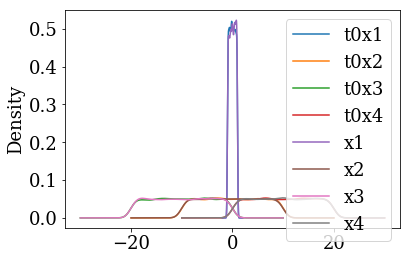

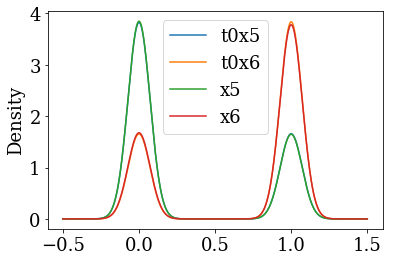

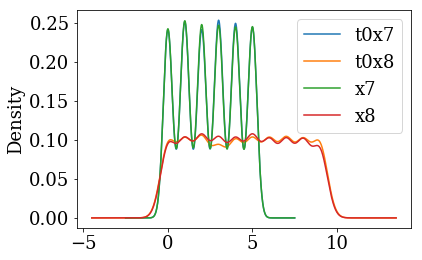

In [171]:
pd.DataFrame({'t0x1': t0[:, 0], 't0x2': t0[:, 1], 't0x3': t0[:, 2], 't0x4': t0[:, 3], \
             'x1': t1[:, 0], 'x2': t1[:, 1], 'x3': t1[:, 2], 'x4': t1[:, 3]}).plot.kde()

pd.DataFrame({'t0x5': t0[:, 4], 't0x6': t0[:, 5], 'x5': t1[:, 4], 'x6': t1[:, 5]}).plot.kde()
pd.DataFrame({'t0x7': t0[:, 6], 't0x8': t0[:, 7], 'x7': t1[:, 6], 'x8': t1[:, 7]}).plot.kde()

In [172]:
from sklearn.preprocessing import KBinsDiscretizer
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [173]:
t0_t1 = np.concatenate((t0, t1), axis=0)
t_bin_ = binner.fit_transform(t0_t1[:,:4])
t_bin = np.concatenate((t_bin_, t0_t1[:,4:]), axis=1)


In [174]:
t_bin.shape

(20000, 8)

In [175]:
np.unique(t_bin[len(t0):,:][:, 7])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [176]:
t1_v = []

#x1: 7,8,9 & x3: 3,4,5, & x8: 5,6,7,8 : voilation
for row in t_bin[len(t0):,:]:
    if row[0] < 7 or not (row[2] > 2 and row[2] < 6) or not (row[7] > 4 and row[7] < 9):
        t1_v.append(row)

t1_v = np.array(t1_v)

In [177]:
#8D data

d1 = pd.DataFrame(t_bin[:len(t0),:], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'])
d2 = pd.DataFrame(t1_v, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'])

d1['y'] = 0
d2['y'] = 1

df = pd.concat([d1, d2], ignore_index=True)

# df.to_csv('synthetic_positivity_data.csv')

In [22]:
def marg(var):
    
    g = df[[var, 'y']].groupby(var)
    
    y_cond = df[var].apply(lambda x: g.mean().at[x, 'y']) #P(Y|x)
    
    marg_ = g.count()/len(df)
    x_marg = df[var].apply(lambda x: marg_.at[x, 'y']) #P(x)
    
    print(y_cond.head(n=3))
    print(x_marg.head(n=3))
    
    return y_cond * x_marg
    

In [23]:
x1_prob = marg('x1')
x2_prob = marg('x2')
x3_prob = marg('x3')
x4_prob = marg('x4')
x5_prob = marg('x5')
x6_prob = marg('x6')
x7_prob = marg('x7')
x8_prob = marg('x8')

0    0.518911
1    0.468767
2    0.492269
Name: x1, dtype: float64
0    0.101096
1    0.095488
2    0.102218
Name: x1, dtype: float64
0    0.488226
1    0.488226
2    0.489394
Name: x2, dtype: float64
0    0.097425
1    0.097425
2    0.100943
Name: x2, dtype: float64
0    0.489669
1    0.476842
2    0.501969
Name: x3, dtype: float64
0    0.098700
1    0.096865
2    0.103594
Name: x3, dtype: float64
0    0.493088
1    0.485757
2    0.485757
Name: x4, dtype: float64
0    0.099567
1    0.102014
2    0.102014
Name: x4, dtype: float64
0    0.489359
1    0.489359
2    0.492112
Name: x5, dtype: float64
0    0.699465
1    0.699465
2    0.300535
Name: x5, dtype: float64
0    0.494512
1    0.494512
2    0.494512
Name: x6, dtype: float64
0    0.701351
1    0.701351
2    0.701351
Name: x6, dtype: float64
0    0.482267
1    0.478839
2    0.478839
Name: x7, dtype: float64
0    0.168188
1    0.168646
2    0.168646
Name: x7, dtype: float64
0    0.502944
1    0.509360
2    0.483937
Name: x8, dtype: flo

In [406]:
df.groupby(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']).mean()['y']

x1    x2    x3    x4    x5   x6   x7   x8 
0.0   0.0   0.0   13.0  1.0  1.0  5.0  6.0    0.0
            1.0   5.0   1.0  1.0  1.0  0.0    0.0
                  15.0  0.0  1.0  0.0  4.0    1.0
                        1.0  1.0  1.0  9.0    0.0
                  19.0  0.0  1.0  1.0  5.0    0.0
            2.0   8.0   0.0  1.0  1.0  5.0    0.0
                  13.0  1.0  1.0  4.0  8.0    1.0
                  16.0  1.0  0.0  0.0  3.0    0.0
            3.0   0.0   0.0  1.0  5.0  8.0    1.0
            5.0   1.0   1.0  1.0  0.0  3.0    0.0
            6.0   0.0   0.0  0.0  0.0  6.0    1.0
                  6.0   1.0  0.0  1.0  6.0    0.0
                  12.0  0.0  1.0  0.0  8.0    1.0
                  18.0  0.0  1.0  5.0  4.0    1.0
            7.0   0.0   1.0  1.0  1.0  5.0    0.0
                  6.0   0.0  1.0  4.0  9.0    1.0
            8.0   3.0   1.0  0.0  1.0  2.0    0.0
                  6.0   0.0  0.0  2.0  1.0    1.0
                             1.0  5.0  6.0    1.0
       

In [310]:
# 2D data
t0 = np.concatenate((t0x.reshape(1000, 1), t0y.reshape(1000, 1)), axis=1)
t1 = np.concatenate((t1x.reshape(len(t1x), 1), t1y.reshape(len(t1x), 1)), axis=1)

X = np.concatenate((t0, t1))
y = np.array([0] * len(t0) + [1] * len(t1))

df_2d = pd.concat([pd.DataFrame(X, columns=['x', 'y']), pd.Series(y, name='y_')], axis=1)

In [311]:
df_2d.head()

,x,y,y_
0,-0.289589,-0.623233,0
1,0.419868,-0.044491,0
2,-0.163585,0.376682,0
3,0.830839,-0.138342,0
4,-0.396024,0.709717,0


## Propensity Visualization

In [12]:
from causallib.estimation import IPW, Standardization, StratifiedStandardization
from causallib.evaluation import PropensityEvaluator, OutcomeEvaluator
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from causallib.estimation import IPW
from causallib.estimation import DoublyRobustVanilla, DoublyRobustIpFeature, DoublyRobustJoffe

In [20]:
# Train:
learner = LogisticRegression(solver="liblinear")
# learner = RandomForestClassifier()
ipw = IPW(learner)
ipw.fit(df[df.columns[:8]], df[df.columns[8]])
# ipw.fit(X, y)

IPW(truncate_eps=None, use_stabilized=False,
    learner=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))

In [21]:
z0 = generate_data(n)
z1 = generate_data(n)

z0_z1 = np.concatenate((z0, z1), axis=0)
z_bin_ = binner.fit_transform(z0_z1[:,:4])
X = np.concatenate((z_bin_, z0_z1[:,4:]), axis=1)

y = np.array([0] * len(z0) + [1] * len(z1))

In [22]:
learner.fit(X, y).score(X, y)

0.5126

In [23]:
learner.score(df[df.columns[:8]], df[df.columns[8]])

0.49394340390879476

In [24]:
p = ipw.compute_propensity(df[df.columns[:8]], df[df.columns[8]])
# p = ipw.compute_propensity(pd.DataFrame(X), pd.Series(y))

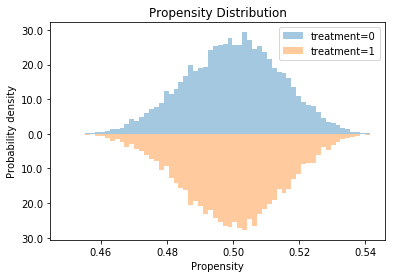

In [26]:
from causallib.evaluation import plots
plots.plot_propensity_score_distribution(p, df[df.columns[8]])
# plots.plot_propensity_score_distribution(p, y)

In [27]:
p.name = 'propensity'
df_prop = pd.concat([df, p], axis=1)

In [538]:
df_prop.to_csv('positivity_data.csv')

## Overrule

In [1]:
import sys, os
import numpy as np
sys.path.append('./overlap-code')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, datasets
from sklearn.neighbors import KernelDensity
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score, precision_recall_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from overrule.overrule import OverRule2Stage
from overrule.baselines import knn, marginal, propscore, svm
from overrule.support import SVMSupportEstimator, SupportEstimator
from overrule.overlap import SupportOverlapEstimator
from overrule.ruleset import BCSRulesetEstimator, RulesetEstimator


In [192]:
X.shape

(1399, 2)

Learning Boolean rule set on DNF form with hamming loss
Initial solve completed
Learning Boolean rule set on DNF form with hamming loss
Initial solve completed


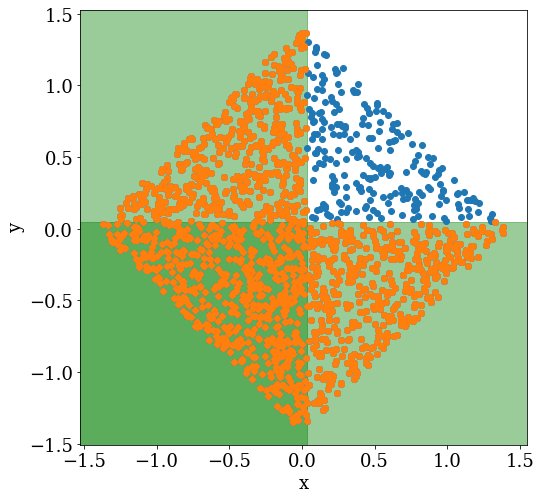

In [322]:
f_cols = ['x', 'y']
D = df_2d.copy()
# Define base estimator
exp_label = 'knn'
O = knn.KNNOverlapEstimator(k=5)

# Define rule estimators
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.9, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.9, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(D[f_cols], D['y_'])

# Get learned rules
rules = M.rules(as_str=True)

# Plot rules
plt.rc('font', size=18, family='serif')
R = M.rules()[1]
O = M.predict(D[f_cols])
    
l = 0
fig, axs = plt.subplots(1,1,figsize=(8,8))

f1 = f_cols[0]
f2 = f_cols[1]

axs.scatter(D[f1], D[f2])
axs.scatter(D.iloc[O==1][f1], D.iloc[O==1][f2])

axs.set_xlabel('x')
axs.set_ylabel('y')


for k in R:
    x0l = D[f1].min()-2
    x0u = D[f1].max()+2
    x1l = D[f2].min()-2
    x1u = D[f2].max()+2
    for a in k:
        if a[0] == f1 and a[1] == '>':
            x0l = a[2]
        if a[0] == f1 and a[1] == '<=':
            x0u = a[2]
        if a[0] == f2 and a[1] == '>':
            x1l = a[2]
        if a[0] == f2 and a[1] == '<=':
            x1u = a[2]

    color = 'g'
    rect = patches.Rectangle((x0l,x1l),x0u-x0l,x1u-x1l,linewidth=1,
                             edgecolor=color, facecolor=color, alpha=.4, zorder=-4)
    axs.add_patch(rect)

        
plt.show()


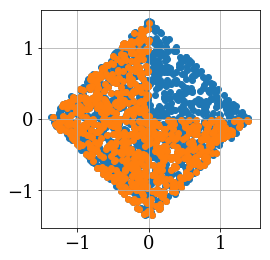

In [320]:
fig, ax = plt.subplots() 

ax.scatter(D[f1], D[f2])
ax.scatter(D[D['y_'] == 1][f1], D[D['y_'] == 1][f2])


ax.set_aspect(aspect='equal')
ax.grid(True)
plt.show()

In [323]:
print(rule_str(M.rules()[0]))
print(rule_str(M.rules()[1]))

  ()
  ((X[x] <= 0.036))
| ((X[y] <= 0.050))


## Bias scan (2d)

In [3]:
sys.path.append('./KDD_BiasScan')

import pickle as pkl
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import OrderedDict
from multiprocessing.pool import Pool
from multiprocessing import cpu_count
import time

from BiasScan.MDSS import *
import BiasScan


In [51]:
D.head()

,x,y,y_
0,-0.403174,-0.452789,0
1,0.184283,-1.070360,0
2,0.218554,0.088021,0
3,0.078527,-1.130144,0
4,-0.760688,0.073802,0


In [166]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [167]:
# scan_data = pd.read_csv('positivity_data.csv')
# covariates = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
# outcome = 'y'

scan_data = D

clf = KNeighborsClassifier(n_neighbors=10)
covariates = ['x', 'y']
outcome = 'y_'

binn = binner.fit_transform(scan_data[covariates])
scan_data['_x_'] = binn[:, 0]
scan_data['_y_'] = binn[:, 1]
covariates = ['_x_', '_y_']


clf.fit(scan_data[covariates], scan_data['y_'])
y_pred = clf.predict_proba(scan_data[covariates])[:, 1]
scan_data['prob'] = y_pred

scan_data['0.5'] = len(scan_data) * [y.mean()]

domains = {}

for cov in covariates:
    domains[cov] = np.unique(scan_data[cov])
    
observed = 'y_'
expected = '0.5' 

def experimentn(i, seed):
    np.random.seed(seed)
    
    mdscan_data_local = scan_data.copy()
    results = {}
    
    # define scanner
    scanner = MDSS(
        optim_q_mle=bisection_q_mle,
        solver_q_min=bisection_q_min,
        solver_q_max=bisection_q_max,
    )

    # run MDSS
    subset, score = scanner.run_bias_scan(  
        coordinates=mdscan_data_local[covariates],
        probs=mdscan_data_local[expected], 
        outcomes=mdscan_data_local[observed],
        penalty=PENALTY, 
        num_iters=NUM_RESTARTS, 
        direction='negative',
        num_threads=1
    )
        
    return score, subset

NUM_RESTARTS = 5
NUM_EXPERIMENTS = 1
PENALTY = 0.01

num_experiments = NUM_EXPERIMENTS
results = {}
acc = {}

# start time
start = time.time()

# define thread pool
pool = Pool(processes=cpu_count() - 1)

scores = []
seeds = np.random.randint(0, 99999, size=num_experiments)
for i in range(num_experiments):
    scores.append(pool.apply_async(experimentn, (i, seeds[i])))

          
# close thread pool & wait for all jobs to be done
pool.close()
pool.join()

# collect the results
scores = [res.get() for res in scores]
 
# print duration
print("Ellapsed: %.2f" % (time.time() - start))

Ellapsed: 7.86


In [168]:
scores

[(2.6180014903154634, {'_x_': [9.0, 6.0], '_y_': [9.0, 6.0, 7.0]})]

In [55]:
scan_data.head()

,x,y,y_,_x_,_y_,prob,0.5
0,-0.403174,-0.452789,0,3.0,3.0,0.0,0.278499
1,0.184283,-1.070360,0,5.0,1.0,0.2,0.278499
2,0.218554,0.088021,0,5.0,5.0,0.1,0.278499
3,0.078527,-1.130144,0,5.0,0.0,0.5,0.278499
4,-0.760688,0.073802,0,2.0,5.0,0.4,0.278499


Learning Boolean rule set on DNF form with hamming loss
Initial solve completed
Learning Boolean rule set on DNF form with hamming loss
Initial solve completed


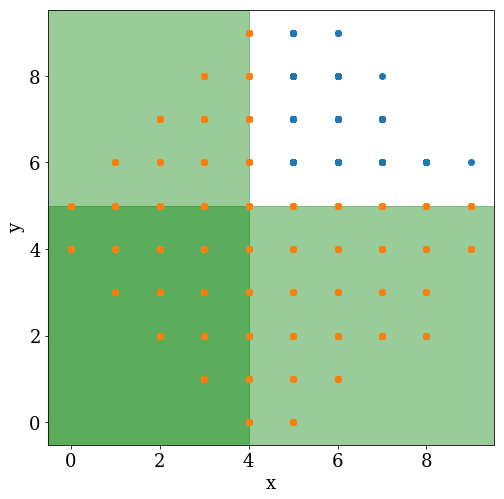

In [56]:
f_cols = ['_x_', '_y_']

# Define base estimator
exp_label = 'knn'
O = knn.KNNOverlapEstimator(k=10)

# Define rule estimators
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.7, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.7, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(D[f_cols], D['y_'])

# Get learned rules
rules = M.rules(as_str=True)

# Plot rules
plt.rc('font', size=18, family='serif')
R = M.rules()[1]
O = M.predict(D[f_cols])
    
l = 0
fig, axs = plt.subplots(1,1,figsize=(8,8))

f1 = f_cols[0]
f2 = f_cols[1]

axs.scatter(D[f1], D[f2])
axs.scatter(D.iloc[O==1][f1], D.iloc[O==1][f2])

axs.set_xlabel('x')
axs.set_ylabel('y')


for k in R:
    x0l = D[f1].min()-2
    x0u = D[f1].max()+2
    x1l = D[f2].min()-2
    x1u = D[f2].max()+2
    for a in k:
        if a[0] == f1 and a[1] == '>':
            x0l = a[2]
        if a[0] == f1 and a[1] == '<=':
            x0u = a[2]
        if a[0] == f2 and a[1] == '>':
            x1l = a[2]
        if a[0] == f2 and a[1] == '<=':
            x1u = a[2]

    color = 'g'
    rect = patches.Rectangle((x0l,x1l),x0u-x0l,x1u-x1l,linewidth=1,
                             edgecolor=color, facecolor=color, alpha=.4, zorder=-4)
    axs.add_patch(rect)

        
plt.show()


In [57]:
rules[1]

'  ([_x_ <= 4.000])\n∨ ([_y_ <= 5.000])'

In [58]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,7.0,6.0,8.0,6.0,0.0,1.0,0.0,9.0,0
1,6.0,3.0,6.0,2.0,0.0,1.0,4.0,6.0,0
2,4.0,0.0,0.0,8.0,0.0,0.0,5.0,9.0,0
3,6.0,3.0,5.0,1.0,0.0,0.0,3.0,9.0,0
4,6.0,3.0,5.0,3.0,1.0,1.0,0.0,0.0,0


## Biasscan 8d

In [180]:
scan_data = df
covariates = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
outcome = 'y'

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(scan_data[covariates], scan_data['y'])
y_pred = clf.predict_proba(scan_data[covariates])[:, 1]
scan_data['prob'] = y_pred

gnb.fit(scan_data[covariates], scan_data['y'])
y_pred_gnb = gnb.predict_proba(scan_data[covariates])[:, 1]
scan_data['prob_gnb'] = y_pred_gnb

scan_data['0.5'] = [df['y'].mean()] * len(scan_data)
domains = {}

for cov in covariates:
    domains[cov] = np.unique(scan_data[cov])
    
observed = 'y'
expected = 'prob_gnb' 

def experimentn(i, seed):
    np.random.seed(seed)
    
    mdscan_data_local = scan_data.copy()
    results = {}
    
    # define scanner
    scanner = MDSS(
        optim_q_mle=bisection_q_mle,
        solver_q_min=bisection_q_min,
        solver_q_max=bisection_q_max,
    )

    # run MDSS
    subset, score = scanner.run_bias_scan(  
        coordinates=mdscan_data_local[covariates],
        probs=mdscan_data_local[expected], 
        outcomes=mdscan_data_local[observed],
        penalty=PENALTY, 
        num_iters=NUM_RESTARTS, 
        direction='negative',
        num_threads=1
    )
        
    return score, subset

NUM_RESTARTS = 50
NUM_EXPERIMENTS = 1
PENALTY = 0.000005

num_experiments = NUM_EXPERIMENTS
results = {}
acc = {}

# start time
start = time.time()

# define thread pool
pool = Pool(processes=cpu_count() - 1)

scores = []
seeds = np.random.randint(0, 99999, size=num_experiments)
for i in range(num_experiments):
    scores.append(pool.apply_async(experimentn, (i, seeds[i])))

          
# close thread pool & wait for all jobs to be done
pool.close()
pool.join()

# collect the results
scores = [res.get() for res in scores]
 
# print duration
print("Ellapsed: %.2f" % (time.time() - start))

Ellapsed: 98.42


In [179]:
scores

[(230.72181271137546,
  {'x1': [7.0, 8.0, 9.0], 'x3': [3.0, 4.0, 5.0], 'x8': [8.0, 5.0, 6.0, 7.0]})]

In [181]:
scores

[(217.90794369912243,
  {'x1': [7.0, 8.0, 9.0], 'x3': [3.0, 4.0, 5.0], 'x8': [8.0, 5.0, 6.0, 7.0]})]

## Overrule 8d

Learning Boolean rule set on DNF form with hamming loss
Initial solve completed
Learning Boolean rule set on DNF form with hamming loss
Initial solve completed


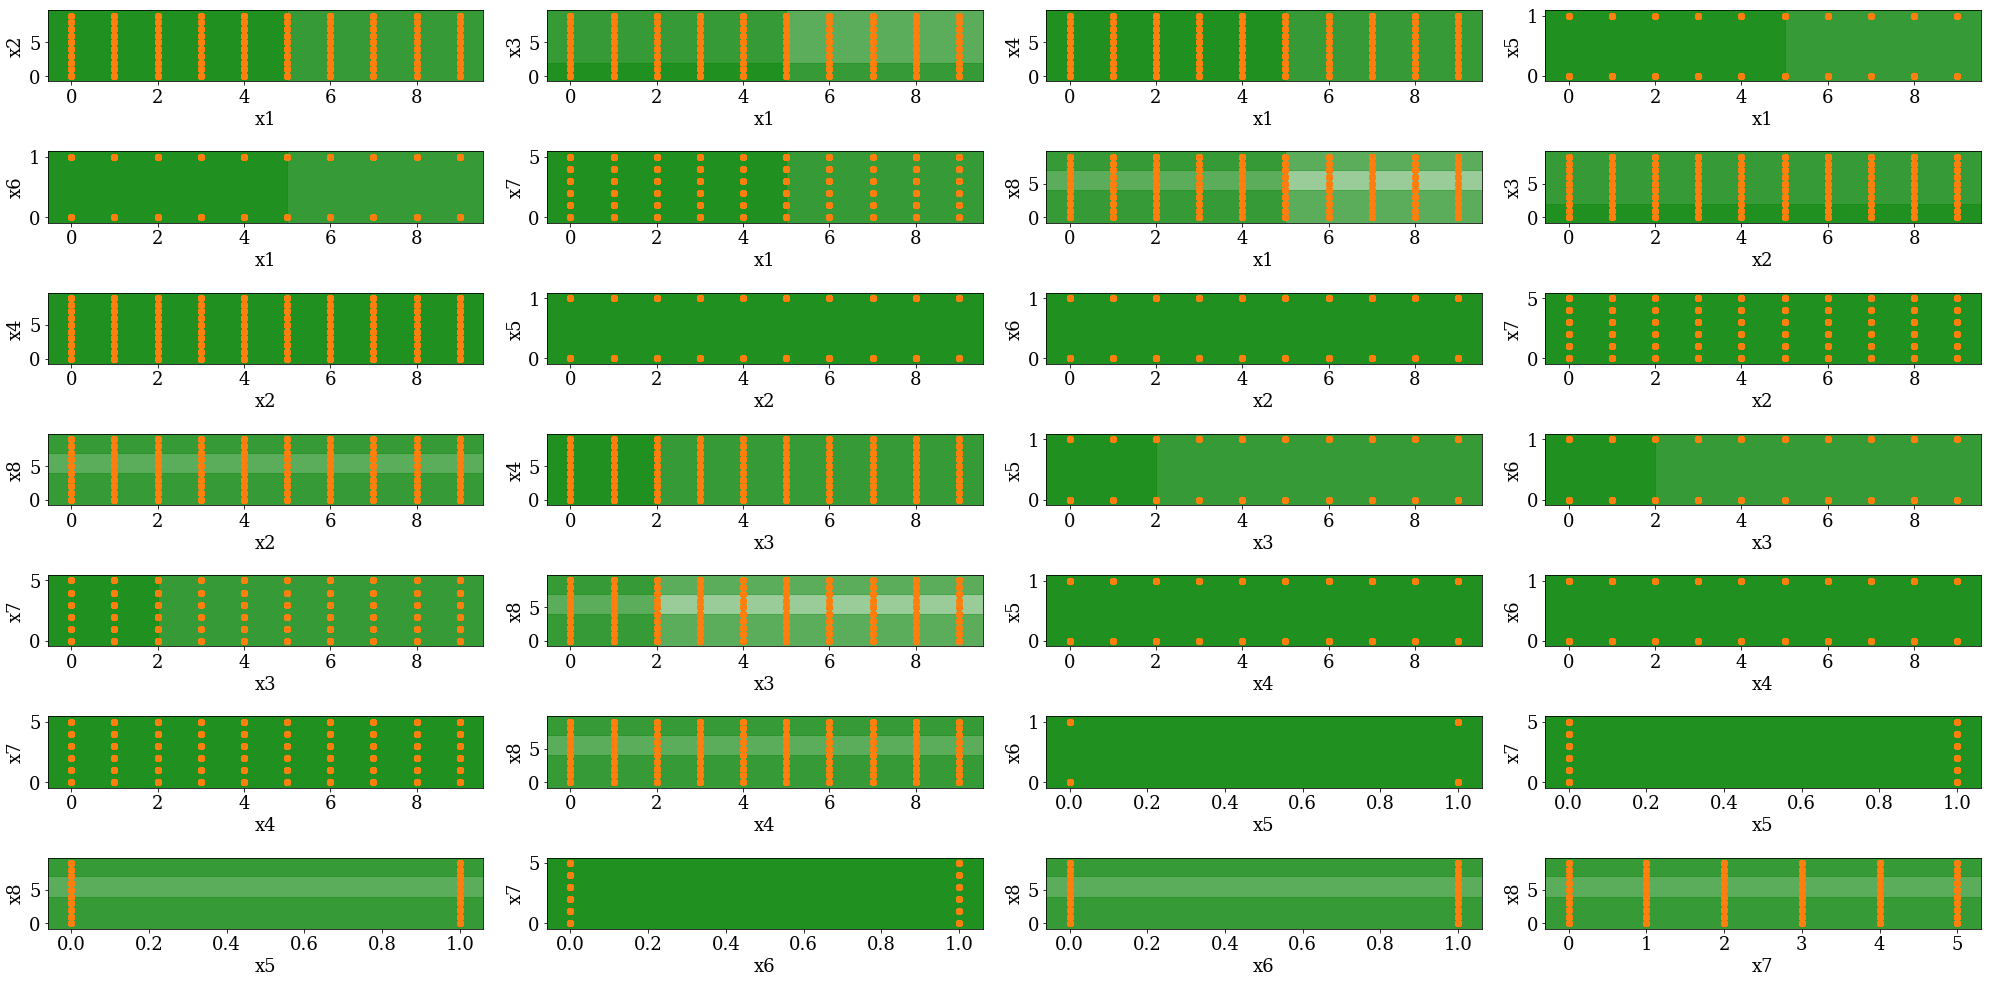

In [61]:
f_cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# Define base estimator
exp_label = 'knn'
O = knn.KNNOverlapEstimator(k=10)

# Define rule estimators
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.7, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.7, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(df[f_cols], df['y'])

# Get learned rules
rules = M.rules(as_str=True)

# Plot rules
plt.rc('font', size=18, family='serif')
R = M.rules()[1]
O = M.predict(df[f_cols])
    
l = 0
fig, axs = plt.subplots(7,4,figsize=(28,14))

for i in range(len(f_cols)):
    for j in range(i+1, len(f_cols)):

        f1 = f_cols[i]
        f2 = f_cols[j]

        axs[int(l/4), l%4].scatter(df[f1], df[f2])
        axs[int(l/4), l%4].scatter(df.iloc[O==1][f1], df.iloc[O==1][f2])

        axs[int(l/4), l%4].set_xlabel(f1)
        axs[int(l/4), l%4].set_ylabel(f2)

        for k in R:
            x0l = df[f1].min()-2
            x0u = df[f1].max()+2
            x1l = df[f2].min()-2
            x1u = df[f2].max()+2
            for a in k:
                if a[0] == f1 and a[1] == '>':
                    x0l = a[2]
                if a[0] == f1 and a[1] == '<=':
                    x0u = a[2]
                if a[0] == f2 and a[1] == '>':
                    x1l = a[2]
                if a[0] == f2 and a[1] == '<=':
                    x1u = a[2]

            color = 'g'
            rect = patches.Rectangle((x0l,x1l),x0u-x0l,x1u-x1l,linewidth=1,
                                     edgecolor=color, facecolor=color, alpha=.4, zorder=-4)
            axs[int(l/4), l%4].add_patch(rect)
        l += 1

plt.tight_layout()        
plt.show()


In [80]:
rules

([[]],
 [[('x1', '<=', 5.0)],
  [('x3', '<=', 2.0)],
  [('x8', '<=', 4.0)],
  [('x8', '>', 7.0)]])

## Overrule Family Planning 

In [339]:
df = pd.read_csv('./fp_injectables_data.csv')

y = df['outcome'] * 1
a = df['treatment'] * 1
X = df[df.columns[:-2]]
X = X.apply(lambda x: x.fillna(x.median()),axis='rows')

f_cols = X.columns

# Define base estimator
exp_label = 'knn'
O = knn.KNNOverlapEstimator(k=10)

# Define rule estimators
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.7, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.7, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(X, a)

# Get learned rules
rules = M.rules(as_str=True)


Learning Boolean rule set on DNF form with hamming loss
Initial solve completed
Iteration: 1, Objective: 0.6430
Learning Boolean rule set on DNF form with hamming loss
Initial solve completed


In [340]:
M.rules(as_str=True)

('  ([v130 <= 4.000] ∧ [v202 <= 7.000] ∧ [v204 <= 5.000] ∧ [v206 <= 3.000] ∧ [v208 <= 3.000] ∧ [v209 <= 1.000] ∧ not v210 ∧ [v238 <= 2.000] ∧ v301)',
 '  ([v191 <= 148893.400])')

  ((X[v130] <= 4.000) & (X[v202] <= 7.000) & (X[v204] <= 5.000) & (X[v206] <= 3.000) & (X[v208] <= 3.000) & (X[v209] <= 1.000) & not v210 & (X[v238] <= 2.000) & v301)
  ((X[v191] <= 148893.400))


In [229]:
base_estimator = LogisticRegression(solver='liblinear', max_iter=2000)
learner = CalibratedClassifierCV(base_estimator=base_estimator, cv=5, method='sigmoid')

O = propscore.PropensityOverlapEstimator(estimator=learner)

# Define rule estimators
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.7, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.7, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(X, a)

# Get learned rules
rules = M.rules(as_str=False)

Learning Boolean rule set on DNF form with hamming loss
Initial solve completed
Iteration: 1, Objective: 0.6430
Learning Boolean rule set on DNF form with hamming loss
Initial solve completed


In [230]:
M.rules(as_str=True)

('  ([v130 <= 4.000] ∧ [v202 <= 7.000] ∧ [v204 <= 5.000] ∧ [v206 <= 3.000] ∧ [v208 <= 3.000] ∧ [v209 <= 1.000] ∧ not v210 ∧ [v238 <= 2.000] ∧ v301 ∧ [v525 <= 96.000])',
 '  ([v128 > 36.000])\n∨ ([v152 <= 27.000])\n∨ ([v235 > 0.000])\n∨ ([v532 > 5.000])\n∨ ([v624 <= 1.000])\n∨ ([v625 > 2.000])')

In [239]:
print(rule_str(M.rules()[0]))
print(rule_str(M.rules()[1]))

  ((X[v130] <= 4.000) & (X[v202] <= 7.000) & (X[v204] <= 5.000) & (X[v206] <= 3.000) & (X[v208] <= 3.000) & (X[v209] <= 1.000) & not v210 & (X[v238] <= 2.000) & v301 & (X[v525] <= 96.000))
  ((X[v128] > 36.000))
| ((X[v152] <= 27.000))
| ((X[v235] > 0.000))
| ((X[v532] > 5.000))
| ((X[v624] <= 1.000))
| ((X[v625] > 2.000))


In [399]:
std = StratifiedStandardization(LinearRegression())
dr = DoublyRobustVanilla(std, IPW(O.M, use_stabilized=True))
dr.fit(X, a, y)

DoublyRobustVanilla(outcome_covariates=None, outcome_model=StratifiedStandardization(learner=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)), predict_proba=False, weight_covariates=None,
                    weight_model=IPW(truncate_eps=None, use_stabilized=True,
    learner=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')))

In [400]:
ipw = IPW(learner, use_stabilized=True)
ipw.fit(X, a)

IPW(truncate_eps=None, use_stabilized=True,
    learner=CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
            cv=5, method='isotonic'))

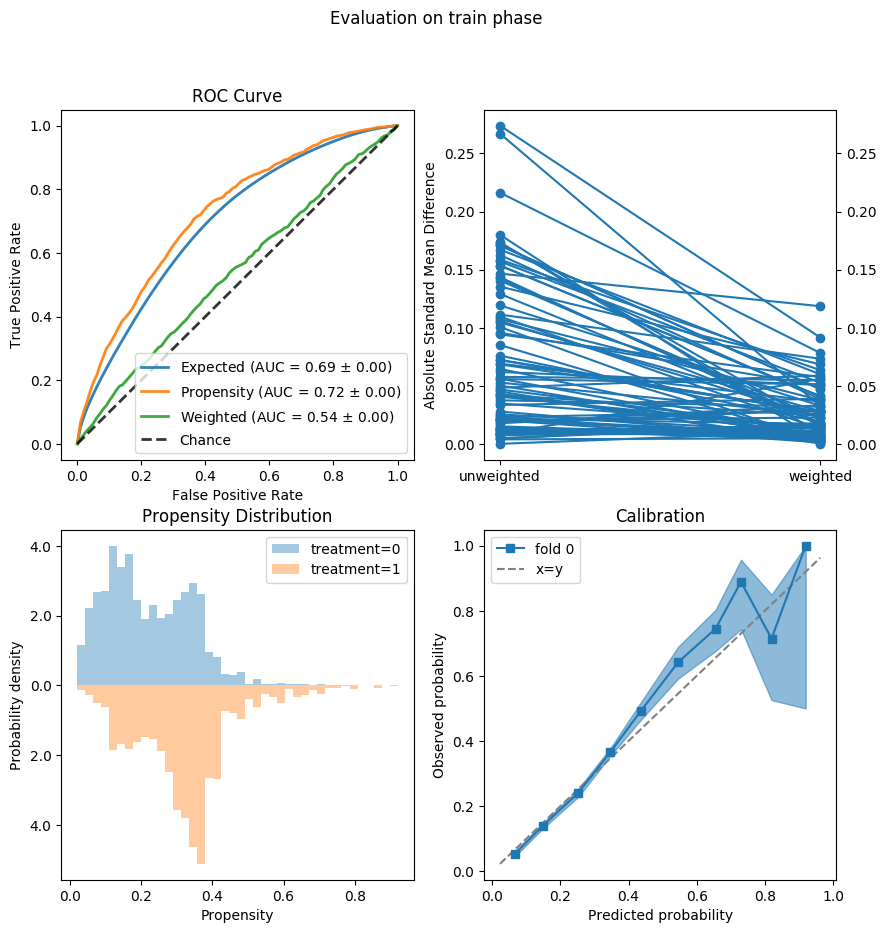

In [396]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plots=["roc_curve", "covariate_balance_slope", "weight_distribution", "calibration"]
evaluator = PropensityEvaluator(ipw)
evaluations = evaluator.evaluate_simple(X, a, y, plots=plots)

fig = evaluations.plots['weight_distribution'].get_figure().set_size_inches(10, 10) 

## Entire population effect

In [401]:
potential_outcomes = dr.weight_model.estimate_population_outcome(X, a, y)
causal_effect = dr.weight_model.estimate_effect(potential_outcomes[1], potential_outcomes[0])
print(causal_effect)

potential_outcomes = dr.estimate_population_outcome(X, a, y)
causal_effect = dr.estimate_effect(potential_outcomes[1], potential_outcomes[0])
print(causal_effect)

potential_outcomes = ipw.estimate_population_outcome(X, a, y)
causal_effect = ipw.estimate_effect(potential_outcomes[1], potential_outcomes[0])
print(causal_effect)


diff    0.014543
dtype: float64
diff    0.036715
dtype: float64
diff    0.030983
dtype: float64


In [422]:
support = X[((X['v130'] <= 4.000) & (X['v202'] <= 7.000) & (X['v204'] <= 5.000) & 
           (X['v206'] <= 3.000) & (X['v208'] <= 3.000) & (X['v209'] <= 1.000) & 
           ~X['v210'] & (X['v238'] <= 2.000) & X['v301'])]
propensity = X[((X['v191'] <= 148893.400))]

knn_overlap = pd.merge(support, propensity, how='inner')
print(knn_overlap.head())

intersection = set(list(support.index)).intersection(set(list(propensity.index)))
knn_ay = df[['outcome', 'treatment']].iloc[list(intersection)].reset_index()

support = X[((X['v130'] <= 4.000) & (X['v202'] <= 7.000) & (X['v204'] <= 5.000) & (X['v206'] <= 3.000) & 
           (X['v208'] <= 3.000) & (X['v209'] <= 1.000) &  ~X['v210'] & (X['v238'] <= 2.000) & X['v301'] & 
           (X['v525'] <= 96.000))]
propensity = X[((X['v128'] > 36.000)) | ((X['v152'] <= 27.000)) | ((X['v235'] > 0.000)) | 
               ((X['v532'] > 5.000)) | ((X['v624'] <= 1.000)) | ((X['v625'] > 2.000))]

clr_overlap = pd.merge(support, propensity, how='inner')
print(clr_overlap.head())
                                           
intersection = set(list(support.index)).intersection(set(list(propensity.index)))
clr_ay = df[['outcome', 'treatment']].iloc[list(intersection)].reset_index()

   v101  v102  v106  v113   v115  v116  v119  v120  v121  v122  ...  v605  \
0     9     1     2  13.0   20.0  22.0   1.0   1.0   1.0   0.0  ...   3.0   
1     9     1     1  13.0    2.0  23.0   1.0   0.0   1.0   0.0  ...   3.0   
2     9     1     2  31.0   10.0  22.0   1.0   1.0   1.0   0.0  ...   2.0   
3     9     1     1  13.0  996.0  21.0   0.0   0.0   0.0   0.0  ...   5.0   
4     9     1     1  13.0  996.0  21.0   0.0   0.0   0.0   0.0  ...   2.0   

   v613  v614  v623  v624  v625  v626  v627  v628  v629  
0   4.0   4.0   0.0   3.0   0.0   3.0   2.0   2.0   0.0  
1   3.0   3.0   0.0   3.0   0.0   3.0   1.0   2.0   0.0  
2   4.0   4.0   0.0   3.0   0.0   3.0   2.0   2.0   0.0  
3   4.0   4.0   0.0   4.0   0.0   4.0   0.0   0.0   4.0  
4   2.0   2.0   0.0   3.0   0.0   3.0   1.0   1.0   0.0  

[5 rows x 85 columns]
   v101  v102  v106  v113   v115  v116  v119  v120  v121  v122  ...  v605  \
0     9     1     2  13.0   20.0  22.0   1.0   1.0   1.0   0.0  ...   3.0   
1     9     

In [423]:
print(len(knn_overlap)/len(X))
print(len(clr_overlap)/len(X))

0.8960878031510002
0.8530713400601876


In [424]:
overlap_df = pd.concat((knn_overlap, knn_ay), axis=1)
y = overlap_df['outcome'] * 1
a = overlap_df['treatment'] * 1
X = overlap_df[overlap_df.columns[:-2]]

std = StratifiedStandardization(LinearRegression())
dr = DoublyRobustVanilla(std, IPW(O.M, use_stabilized=True))
dr.fit(X, a, y)

overlap_df = pd.concat((clr_overlap, clr_ay), axis=1)
y = overlap_df['outcome'] * 1
a = overlap_df['treatment'] * 1
X = overlap_df[overlap_df.columns[:-2]]

ipw = IPW(learner, use_stabilized=True)
ipw.fit(X, a)

IPW(truncate_eps=None, use_stabilized=True,
    learner=CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
            cv=5, method='isotonic'))

## Overlap population effect

In [425]:
potential_outcomes = dr.weight_model.estimate_population_outcome(X, a, y)
causal_effect = dr.weight_model.estimate_effect(potential_outcomes[1], potential_outcomes[0])
print(causal_effect)

potential_outcomes = dr.estimate_population_outcome(X, a, y)
causal_effect = dr.estimate_effect(potential_outcomes[1], potential_outcomes[0])
print(causal_effect)

potential_outcomes = ipw.estimate_population_outcome(X, a, y)
causal_effect = ipw.estimate_effect(potential_outcomes[1], potential_outcomes[0])
print(causal_effect)


diff    0.019503
dtype: float64
diff    0.040912
dtype: float64
diff    0.029618
dtype: float64


In [6]:
def fatom(f, o, v, fmt='%.3f'):
    if o in ['<=', '>', '>=', '<', '==']:
        if isinstance(v, str):
            return ('(X_df["%s"] %s %s)') % (f,o,v)
        else:
            return ('(X_df["%s"] %s '+fmt+')') % (f,o,v)
    elif o == 'not':
        return '~X_df["%s"].astype(bool)' % f
    else:
        return 'X_df["%s"].astype(bool)' % f

def rule_str(C, fmt='%.3f'):
    s = '  '+'\n| '.join(['(%s)' % (' & '.join([fatom(a[0], a[1], a[2], fmt=fmt) for a in c])) for c in C])
    return s

**Explanation of rules**

A patient is in the overlap set if the support rule applies and any propensity overlap rule applies.
rules[0] and rules[1] 

overlap is typically defined as either a) the intersection of supports, supp(p0) ∩ supp(p1), or b) the set of covariate values for which all group propensities ηt are bounded away from zero

Oα,ę := Sα ∩ Bę

In [160]:
overlap_df = pd.concat((overlap, df[['outcome', 'treatment']].iloc[list(intersection)].reset_index()), axis=1)
overlap_df.to_csv('fp_injectables_data_overrule_overlap.csv')

## Encoding

In [2]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.read_csv('./data/fp_injectables_data.csv')

y = df['outcome'] * 1
a = df['treatment'] * 1
X = df[df.columns[:-2]]
X = X.apply(lambda x: x.fillna(x.median()),axis='rows')

encoding = pd.read_csv('./data/encoding.csv')

# Select and Encode ordinal features
v = encoding[encoding['encoding'] == 'O']['var_name'].values
enc = OrdinalEncoder()
ord_data = enc.fit_transform(X[v])
ord_features = v

# Select and Encode nominal features
v = encoding[encoding['encoding'] == 'L']['var_name'].values
j = X[v].astype(int)
enc = OneHotEncoder(categories='auto')
nom_data = enc.fit_transform(j.astype(int))
nom_features = enc.get_feature_names(v)

# Select the discrete features
v = encoding[encoding['encoding'] == 'N']['var_name'].values
dis_data = X[v].values
dis_features = v


# Combine all the features
X_arr = np.concatenate((ord_data, nom_data.toarray(), dis_data), axis=1)
features_names = np.concatenate((ord_features, nom_features, dis_features))

print(X_arr.shape)
X_df = pd.DataFrame(X_arr, columns=features_names)

(5649, 317)


In [160]:
X_df_ = X_df[X_df['v312_3'] == 1]
y_ = y[X_df['v312_3'] == 1]
a_ = a[X_df['v312_3'] == 1]

In [13]:
f_cols = X_df.columns

# Define base estimmator
exp_label = 'knn'
O = knn.KNNOverlapEstimator(k=8)

# Define rule estimators
#lambda0 controls the number of clauses (clause fixed cost), lambda1  controls the conditions in each clause (cost per literal)
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.99, lambda0=0.9, lambda1=0)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.99, lambda0=0.9, lambda1=0)

# Fit overlap estimator
M = OverRule2Stage(O, RS_o, RS_s)
M.fit(X_df, a)

# Get learned rules
rules = M.rules(as_str=True)

In [7]:
# alpha=.9, lambda0=0.9, lambda1=0
print(rule_str(M.rules()[0]))
print(rule_str(M.rules()[1]))

  (~X_df["v127_96"].astype(bool) & ~X_df["v131_22"].astype(bool) & ~X_df["v161_10"].astype(bool) & ~X_df["v312_7"].astype(bool) & ~X_df["v312_13"].astype(bool) & ~X_df["v532_4"].astype(bool) & ~X_df["v624_0"].astype(bool) & ~X_df["v626_0"].astype(bool) & ~X_df["v626_6"].astype(bool) & (X_df["v227"] <= 1.000))
  ((X_df["v191"] <= 149909.800))


In [9]:
M.score_vs_base(X_df)

0.5940704079219612

In [10]:
# alpha=.99, lambda0=0.01, lambda1=0
print(rule_str(M.rules()[0]))
print(rule_str(M.rules()[1]))

print(M.score_vs_base(X_df))

  ((X_df["v209"] <= 0.000))
| ((X_df["v227"] <= 0.000))
  (X_df["v122_1"].astype(bool))
| (~X_df["v122_1"].astype(bool) & ~X_df["v127_96"].astype(bool) & ~X_df["v129_96"].astype(bool) & ~X_df["v131_22"].astype(bool) & (X_df["v203"] <= 6.000))
0.5101361861406282


In [12]:
# alpha=.99, lambda0=.7, lambda1=0
print(rule_str(M.rules()[0]))
print(rule_str(M.rules()[1]))

print(M.score_vs_base(X_df))

  (~X_df["v127_96"].astype(bool) & ~X_df["v150_7"].astype(bool) & ~X_df["v161_10"].astype(bool) & ~X_df["v312_7"].astype(bool) & ~X_df["v312_13"].astype(bool) & ~X_df["v532_4"].astype(bool) & ~X_df["v624_0"].astype(bool) & ~X_df["v626_0"].astype(bool) & ~X_df["v626_6"].astype(bool) & (X_df["v206"] <= 2.000))
  (X_df["v122_1"].astype(bool))
| (~X_df["v122_1"].astype(bool))
0.5003477215528106


In [14]:
# alpha=.99, lambda0=.9, lambda1=0
print(rule_str(M.rules()[0]))
print(rule_str(M.rules()[1]))

print(M.score_vs_base(X_df))

  ()
  (X_df["v122_1"].astype(bool))
| (~X_df["v122_1"].astype(bool))
0.5


In [ ]:
X = X_df_
a = a_
y = y_

In [67]:
support = X_df[((X_df["v227"] <= 0.000))]
propensity = X_df[((X_df["v191"] <= 171448.000))]

knn_overlap = pd.merge(support, propensity, how='inner')
print(knn_overlap.head())

   v106  v133  v149  v157  v158  v159  v190  v301  v101_1  v101_2  ...  v227  \
0   1.0   7.0   1.0   0.0   2.0   2.0   3.0   1.0     0.0     0.0  ...   0.0   
1   2.0  12.0   4.0   0.0   2.0   1.0   3.0   1.0     0.0     0.0  ...   0.0   
2   1.0   8.0   2.0   0.0   1.0   0.0   3.0   1.0     0.0     0.0  ...   0.0   
3   1.0   6.0   1.0   0.0   2.0   0.0   3.0   1.0     0.0     0.0  ...   0.0   
4   2.0  11.0   3.0   1.0   2.0   1.0   3.0   1.0     0.0     0.0  ...   0.0   

   v235  v238  v525  v531  v613  v614  v627  v628  v629  
0   1.0   0.0  17.0  17.0   3.0   3.0   1.0   2.0   0.0  
1   0.0   3.0  15.0  15.0   3.0   3.0   1.0   2.0   0.0  
2   2.0   0.0  18.0  18.0   2.0   2.0   1.0   1.0   0.0  
3   0.0   1.0  17.0  17.0   4.0   4.0   2.0   2.0   0.0  
4   3.0   1.0  19.0  19.0   2.0   2.0   1.0   1.0   0.0  

[5 rows x 317 columns]


In [68]:
print(len(knn_overlap)/len(X_df))

0.8888888888888888


In [69]:
intersection = set(list(support.index)).intersection(set(list(propensity.index)))
knn_ay = df[['outcome', 'treatment']].iloc[list(intersection)].reset_index(drop=True)

In [ ]:
f_cols = X_df_.columns
base_estimator = LogisticRegression(solver='liblinear', max_iter=2000, C=0.005)
learner = CalibratedClassifierCV(base_estimator=base_estimator, cv=5, method='isotonic')

O2 = propscore.PropensityOverlapEstimator(estimator=learner)

# Define rule estimators
# Neg samps not implemented for CNF
RS_s = BCSRulesetEstimator(n_ref_multiplier=1, alpha=.9, lambda0=.9, lambda1=0, CNF=False)
RS_o = BCSRulesetEstimator(n_ref_multiplier=0, alpha=.9, lambda0=.9, lambda1=0, CNF=False)

# Fit overlap estimator
M2 = OverRule2Stage(O2, RS_o, RS_s)
M2.fit(X_df_, a_)

# Get learned rules
rules2 = M2.rules(as_str=False)

In [ ]:
M2.RS_o.lambda0

In [84]:
print(rule_str(M2.rules()[0]))
print(rule_str(M2.rules()[1]))

  ((X_df["v227"] <= 0.000))
  ((X_df["v106"] <= 1.000))
| (X_df["v602_3"].astype(bool))
| ((X_df["v152"] <= 33.000))


In [99]:
support =  X_df_[(X_df_["v227"] <= 0.000)]

propensity =   X_df_[((X_df_["v106"] <= 1.000))
| (X_df_["v602_3"].astype(bool))
| ((X_df_["v152"] <= 33.000))]


clr_overlap = pd.merge(support, propensity, how='inner')
print(clr_overlap.head())

   v106  v133  v149  v157  v158  v159  v190  v301  v101_1  v101_2  ...  v227  \
0   1.0   7.0   1.0   0.0   2.0   2.0   3.0   1.0     0.0     0.0  ...   0.0   
1   2.0  12.0   4.0   0.0   2.0   1.0   3.0   1.0     0.0     0.0  ...   0.0   
2   1.0   8.0   2.0   0.0   1.0   0.0   3.0   1.0     0.0     0.0  ...   0.0   
3   1.0   6.0   1.0   0.0   2.0   0.0   3.0   1.0     0.0     0.0  ...   0.0   
4   2.0  11.0   3.0   1.0   2.0   1.0   3.0   1.0     0.0     0.0  ...   0.0   

   v235  v238  v525  v531  v613  v614  v627  v628  v629  
0   1.0   0.0  17.0  17.0   3.0   3.0   1.0   2.0   0.0  
1   0.0   3.0  15.0  15.0   3.0   3.0   1.0   2.0   0.0  
2   2.0   0.0  18.0  18.0   2.0   2.0   1.0   1.0   0.0  
3   0.0   1.0  17.0  17.0   4.0   4.0   2.0   2.0   0.0  
4   3.0   1.0  19.0  19.0   2.0   2.0   1.0   1.0   0.0  

[5 rows x 317 columns]


In [100]:
print(len(clr_overlap)/len(X_df_))

0.8492476851851852


In [101]:
intersection = set(list(support.index)).intersection(set(list(propensity.index)))
clr_ay = df[['outcome', 'treatment']].iloc[list(intersection)].reset_index(drop=True)

In [105]:
overlap_df = pd.concat((clr_overlap, clr_ay), axis=1)
y = overlap_df['outcome'] * 1
a = overlap_df['treatment'] * 1
X = overlap_df[overlap_df.columns[:-2]]

In [162]:
strartify_by = (a*2) + y
X_train, X_test, a_train, a_test, y_train, y_test = train_test_split(
    X, a, y, 
    train_size=0.7,
    test_size=0.3,
    shuffle=True, 
    random_state=1, 
    stratify=strartify_by
)

In [163]:
X_test.shape

(658, 317)

In [170]:
# std = StratifiedStandardization(make_pipeline(StandardScaler(), LinearRegression()))
# dr = DoublyRobustIpFeature(std, IPW(make_pipeline(StandardScaler(), learner), use_stabilized=True))

# dr.fit(X_train, a_train, y_train)

base_estimator = LogisticRegression(
    penalty="l2", 
    max_iter=2000,
    class_weight="balanced",
    random_state=2,
    solver='lbfgs',
    C=0.05
)
learner = CalibratedClassifierCV(base_estimator=base_estimator, cv=5, method='sigmoid')

ipw = IPW(make_pipeline(StandardScaler(), learner), use_stabilized=True)
ipw.fit(X_train, a_train)

IPW(truncate_eps=None, use_stabilized=True,
    learner=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('calibratedclassifiercv', CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=2,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
            cv=5, method='sigmoid'))]))

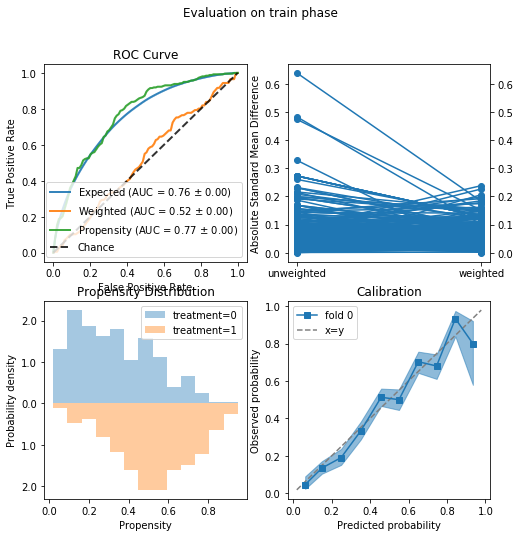

In [171]:
plots=["roc_curve", "covariate_balance_slope", "weight_distribution", "calibration"]
evaluator = PropensityEvaluator(ipw)
evaluations = evaluator.evaluate_simple(X_test.astype(float), a_test, y_test, plots=plots)

fig = evaluations.plots['weight_distribution'].get_figure().set_size_inches(8, 8) 

In [172]:
evaluations.plots['weight_distribution'].get_figure().savefig('pdfs/overall_curr_1.pdf')

## Entire population effect

In [173]:
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore")

effects = []
for i in range(2000):
    X_r, a_r, y_r = resample(X_test, a_test, y_test, n_samples=None, random_state=i)
    
    X_r = X_r.reset_index(drop=True)
    a_r = a_r.reset_index(drop=True)
    y_r = y_r.reset_index(drop=True)
    
    potential_outcomes = ipw.estimate_population_outcome(X_r, a_r, y_r)
    causal_effect = ipw.estimate_effect(potential_outcomes[1], potential_outcomes[0])
    effects.append(causal_effect)

median = np.median(effects)
lower = np.percentile(effects, 2.5)
upper = np.percentile(effects, 97.5)
print(median, lower, upper)

-0.011434579647693895 -0.030482525878532306 0.010261855246623408


In [ ]:
all_inj - 0.08730207138840947 0.013271424807445543 0.19465868276559717
curr_inj =1 = -0.01212501383031369 -0.03343746305398783 0.012648000153116686
curr_inj =0 = 0.11325018014814568 0.03949531808258655 0.195756854842477

In [12]:
# plots=["common_support", "continuous_accuracy"]
# out_evaluator = OutcomeEvaluator(dr)
# out_evaluations = out_evaluator.evaluate_simple(X_test.astype(float), a_test, y_test, plots=plots)
# out_evaluations.plots['common_support'].get_figure().set_size_inches(4, 4)      

# outcome_evaluator.py : 115
# prediction_prob_strata = prediction.prediction_event_prob.loc[current_strata_mask, treatment_value]
# 'NoneType' object has no attribute 'loc'

In [228]:
overlap_df = pd.concat((clr_overlap, clr_ay), axis=1)
y = overlap_df['outcome'] * 1
a = overlap_df['treatment'] * 1
X = overlap_df[overlap_df.columns[:-2]]

In [235]:
overlap_df = pd.concat((knn_overlap, knn_ay), axis=1)
y = overlap_df['outcome'] * 1
a = overlap_df['treatment'] * 1
X = overlap_df[overlap_df.columns[:-2]]


In [236]:
X.shape

(1928, 317)

In [237]:
strartify_by = (a*2) + y
X_train, X_test, a_train, a_test, y_train, y_test = train_test_split(
    X, a, y, 
    train_size=0.7, 
    test_size=0.3,
    shuffle=True, 
    random_state=1, 
    stratify=strartify_by
)

In [238]:
base_estimator = LogisticRegression(
    penalty="l2", 
    max_iter=2000,
    class_weight="balanced",
    random_state=2,
    C=0.5
)
learner = CalibratedClassifierCV(base_estimator=base_estimator, cv=5, method='isotonic')


ipw2 = IPW(make_pipeline(StandardScaler(), learner), use_stabilized=True)
ipw2.fit(X_train.astype(float), a_train)

IPW(truncate_eps=None, use_stabilized=True,
    learner=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('calibratedclassifiercv', CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=2,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
            cv=5, method='isotonic'))]))

In [77]:
len(list(set(list(y[y == 1].index)).intersection(set(list(a[a == 1].index)))))

122

## Overlap population effect

In [239]:
effects = []
for i in range(2000):
    X_r, a_r, y_r = resample(X_test, a_test, y_test, n_samples=None, random_state=i)
    
    X_r = X_r.reset_index(drop=True)
    a_r = a_r.reset_index(drop=True)
    y_r = y_r.reset_index(drop=True)
    
    potential_outcomes = ipw2.estimate_population_outcome(X_r, a_r, y_r)
    causal_effect = ipw2.estimate_effect(potential_outcomes[1], potential_outcomes[0])
    effects.append(causal_effect)

median = np.median(effects)
lower = np.percentile(effects, 2.5)
upper = np.percentile(effects, 97.5)
print(median, lower, upper)

-0.005997841622195047 -0.039619335224950744 0.04380384700255447


In [ ]:
CLR - 0.046320460916497865 0.0004907109439563469 0.0946134484242778
KNN - 0.03585653887883495 -0.004580620944921885 0.09236003186623865

CLR_curr_inj = 1 - -0.030228210897466846 -0.08078423003280816 0.004299579090350736
KNN_curr_inj = 1 - -0.005997841622195047 -0.039619335224950744 0.04380384700255447

CLR_curr_inj = 0 - 0.10749468784732204 0.035770013720111536 0.18724814467194664
KNN_curr_inj = 0 - 0.10537836911976606 0.03074871085792742 0.19343716233348884

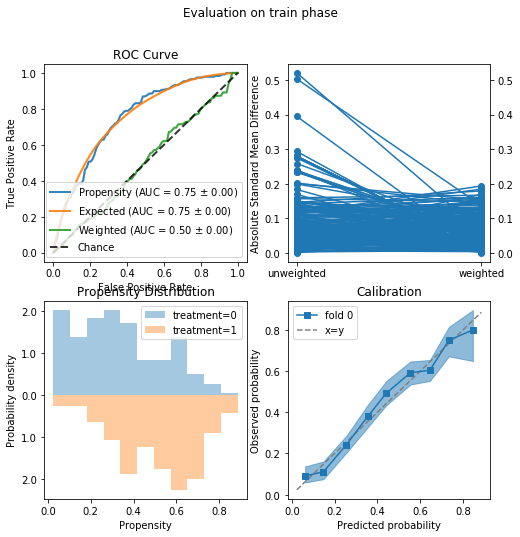

In [241]:
plots=["roc_curve", "covariate_balance_slope", "weight_distribution", "calibration"]
evaluator = PropensityEvaluator(ipw2)
evaluations = evaluator.evaluate_simple(X_test.astype(float), a_test, y_test, plots=plots)

evaluations.plots['weight_distribution'].get_figure().set_size_inches(8, 8) 

In [242]:
evaluations.plots['weight_distribution'].get_figure().savefig('overlap_knn_curr_1.pdf')